# Week11b - 11주차 머신러닝 실습

### 유방암 입력 데이터

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

cancer = load_breast_cancer()
X = cancer.data[:, :2] #Feature 2개만 선택
Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 유방암 SVM모델 학습 및 시각화 코드

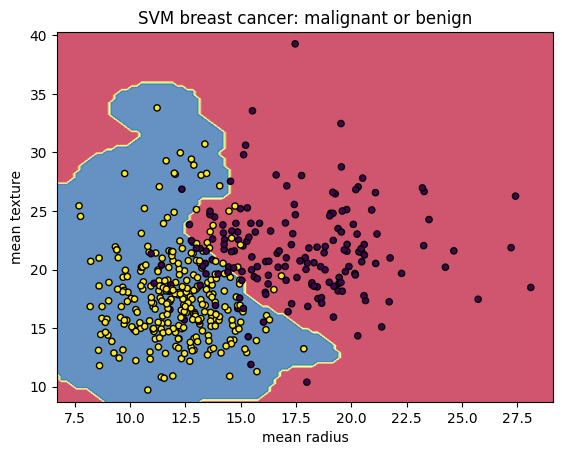

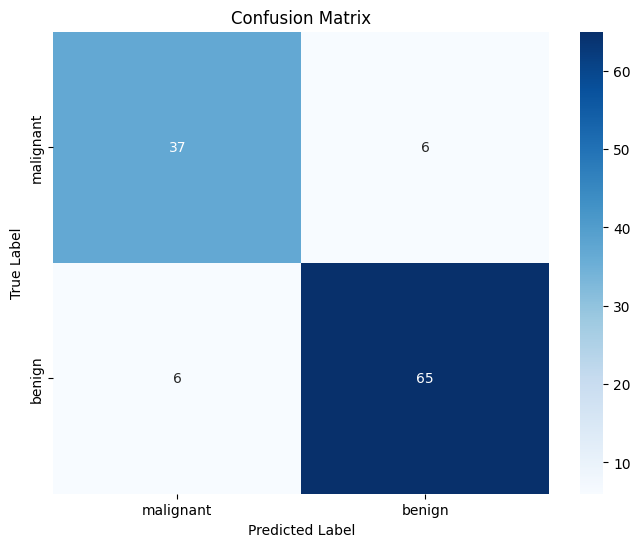

In [2]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1]
)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors="k")
plt.title("SVM breast cancer: malignant or benign")
plt.show()

# confision matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 연봉 income예측 입력 데이터

In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'./income_evaluation.csv')
df.head()
df.columns= df.columns.str.strip()

### 연봉 income예측 입력 데이터 전처리

In [ ]:

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex', 'native-country', 'income']

df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder() # sklear에 있는 문자열 -> 숫자로 변환
    df_encoded[col] = le.fit_transform(df[col]) # 각 열 변환
    label_encoders [col] = le

X = df_encoded.drop('income', axis=1) # label인 income을 빼고
y = df_encoded['income'] # target을 income이라 지정
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### 연봉 income예측 SVM모델 학습 코드

In [5]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
print("Train Score : ", np.mean(accuracies))
print("Test Score : ", svc.score(X_train, y_train))

Train Score :  0.7921145927486349
Test Score :  0.7944179975429976
